In [3]:
!pip install xgboost



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 409.0 kB/s eta 0:06:06
   ---------------------------------------- 0.5/150.0 MB 409.0 kB/s eta 0:06:06
   ---------------------------------------- 0.8/150.0 MB 472.8 kB/s eta 0:05:16
   ---------------------------------------- 0.8/150.0 MB 472.8 kB/s eta 0:05:16
   ---------------------------------------- 1.0/150.0 MB 518.8 kB/s eta 0:04:48
   ---------------------------------------- 1.3/150.0 MB 615.7 kB/s eta 0:04:02
   ---------------------------------------- 1.3/150.0 MB 615.7 kB/s eta 0:04:02
   ---------------------------------------- 1.3/150.0 MB 615.7 kB/s eta 0:04:02
   --

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
import os
print(os.getcwd())



C:\Users\kanth\OneDrive\Desktop\recent learning things\data science\Projects\kaggle_competition


In [21]:
train = pd.read_csv('./Titanic/train.csv')
test = pd.read_csv('./Titanic/test.csv')


In [23]:
print(train.info())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

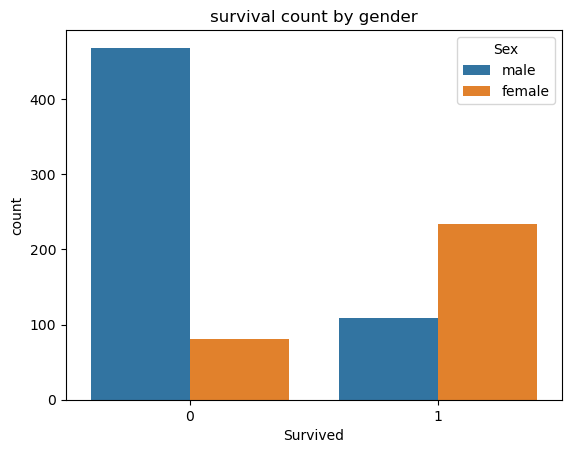

In [35]:
sns.countplot(x='Survived', hue='Sex' , data=train)
plt.title("survival count by gender")
plt.show()

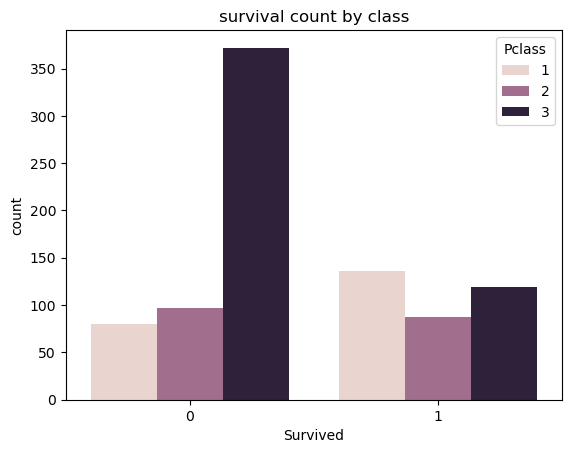

In [41]:
sns.countplot(x='Survived', hue='Pclass' , data = train)
plt.title("survival count by class")
plt.show()

# Assistant
The error occurs because the code is trying to access columns with incorrect case. In pandas DataFrames, column names are case-sensitive.

Looking at the error message, it seems that 'age' (lowercase) doesn't exist in your DataFrame, but you're trying to access it. Based on the code, it appears that the actual column name might be 'Age' (uppercase), since you're using 'Age' in the median calculation.

Similarly, there might be a case mismatch with 'embarked' as well.

Would you like me to provide the corrected code?

# User
yes

In [65]:
# Assistant
data = [train, test]
for dataset in data:
    # Fixed column name 'age' to 'Age' to match the correct case
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    
    # Fixed column name 'embarked' to 'Embarked' assuming it follows the same capitalization pattern
    # If 'Embarked' is not the correct name, you'll need to adjust this to match your actual column name
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    # Note: Added [0] to mode() as it returns a Series, and we need the first value

C:\Users\kanth\AppData\Local\Temp\ipykernel_30064\2548989860.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
C:\Users\kanth\AppData\Local\Temp\ipykernel_30064\2548989860.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co